# CZ gate general numerical simulation

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import SuperoperatorSimulations
from importlib import reload  
simulations  = reload(SuperoperatorSimulations)
sim = simulations.Simulation('O-x-O')

Initializing system O-x-O  ...
Constructing states and excitations...
Constructing ground and first-excited statespace...
Constructing gs_hamiltonian ...
Constructing e1_hamiltonian ...
Constructing interactions V_plus and V_minus ...
Constructing NJ_hamiltonian  ...
Inverting NJ_hamiltonian  ...
Constructing eff_hamiltonian and effective lindblad operators ...

System  O-x-O  initialized in 33.2 seconds.
Getting Lindblad Operators


In [47]:
sim.Run_Simulations(0,3,100,maximize_fidelity = False,equate_losses=False)

Starting qutip simulations for C in 1.0-1000.0


/home/yorgos/Thesis/Code/Yorgos_Thesis/SuperoperatorSimulations.py:226: ComplexWarning: Casting complex values to real discards the imaginary part
  self.AVG_P_failure[C_val_i] = f_prob


In [48]:
sim.parameters

{'v': 100*g,
 'g_f': g,
 'gamma': 1,
 'gamma_g': 0.1,
 'gamma_f': 0.9,
 'DE': 0.09486832980505139*sqrt(g^2 + 22.5),
 'De': 1/10*g,
 'phi': 0,
 'Omega': 0.0125*g,
 'kappa_c': 100,
 'kappa_b': 100,
 'De0': -1/10*g,
 'g0': g,
 'gamma0': 1}

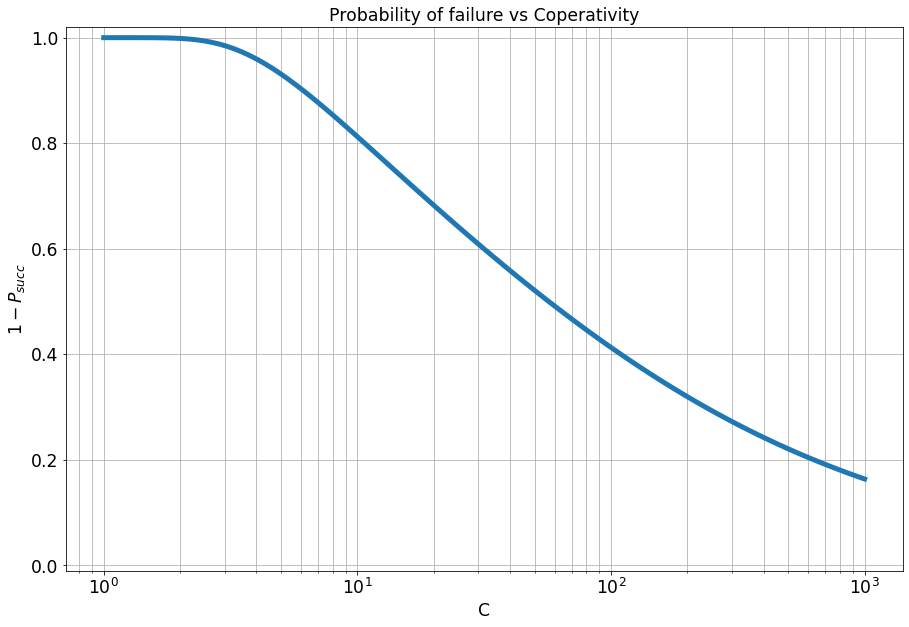

In [49]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
plt.title(f"Probability of failure vs Coperativity")#
plt.plot(sim.C_val_range,sim.AVG_P_failure,linewidth=5.0)
plt.xlabel('C')
plt.ylabel(r"$1-P_{succ}$")
plt.xscale('log')
plt.ylim(-0.01,1.02)
plt.grid(which='both')
plt.savefig(f'plots/1-p.svg')

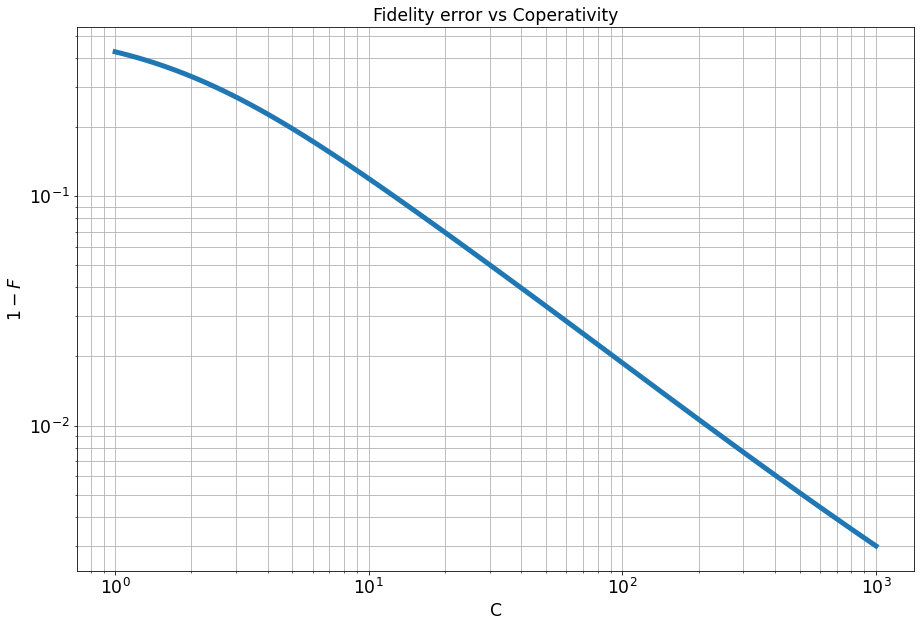

In [50]:
plt.plot(sim.C_val_range,sim.AVG_Infidelity,linewidth=5.0)
plt.title(f'Fidelity error vs Coperativity')
plt.xlabel('C')
plt.ylabel(r"$1-F$")
plt.xscale('log')
plt.yscale('log')

#plt.ylim(-0.1,1.01)
plt.grid(which='both')
plt.savefig(f'plots/1-f.svg')

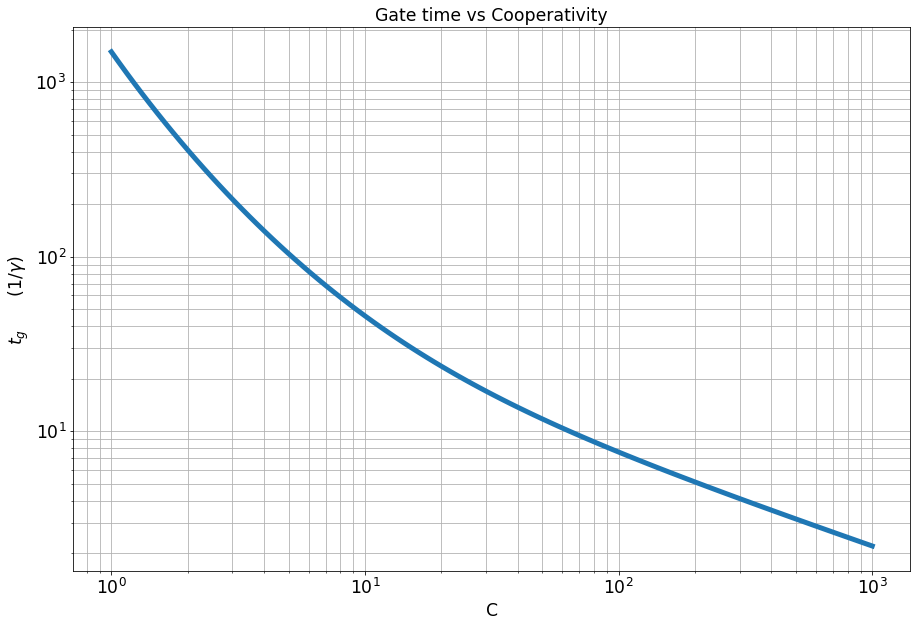

In [51]:
plt.plot(sim.C_val_range,sim.AVG_gate_time,linewidth=5.0)
plt.title(f'Gate time vs Cooperativity')
plt.xlabel('C')
plt.ylabel(r"$t_g \qquad \left( 1/\gamma \right)$ ")
plt.yscale('log')
plt.xscale('log')
plt.grid(which='both')
plt.savefig(f'plots/tg.svg')

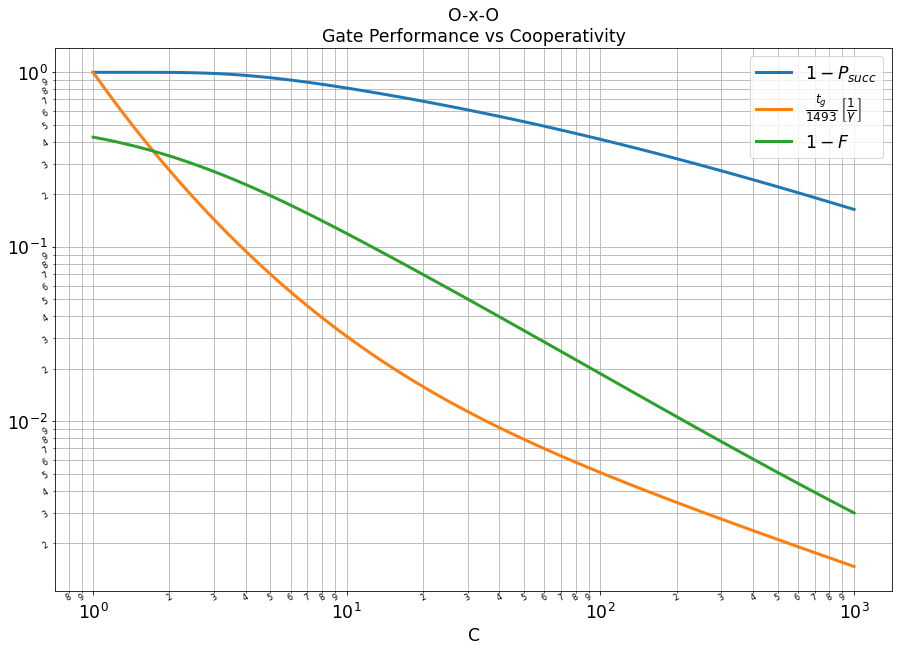

In [52]:
import math
ax =plt.plot(sim.C_val_range,sim.AVG_P_failure,linewidth=3.0,label='$1-P_{succ}$')
plt.plot(sim.C_val_range,sim.AVG_gate_time/np.max(sim.AVG_gate_time),linewidth=3.0,label=r"$\frac{t_g}{"+str(int(np.max(sim.AVG_gate_time)))+"}$"+r"$\,\left[\frac{1}{\gamma}\right]$")
plt.plot(sim.C_val_range,sim.AVG_Infidelity,linewidth=3.0,label='$1-F$')

plt.title(f'{sim.setup_char}\nGate Performance vs Cooperativity')
plt.xlabel('C')
plt.yscale('log')
plt.xscale('log')
plt.grid(which='both')
plt.tick_params(axis='y', which='minor')
plt.legend()
ax = plt.gca()
ax.set_yscale('log')
plt.tick_params(axis='y', which='minor')



def firstDigit(n):
    n = n*10**int(-math.log10(n)+1)
    digits = (int)(math.log10(n))
    n = (int)(n / pow(10, digits))
    return n

from matplotlib.ticker import FuncFormatter
def minor(x, pos):
    return  (firstDigit(x))

formatter = FuncFormatter(minor)
ax.yaxis.set_minor_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.tick_params(axis='both', which='minor', labelsize=8, rotation=30)
ax.tick_params(axis='x',which='minor', pad=-1)
ax.tick_params(axis='x',which='major', pad=8)
plt.legend()
plt.savefig(f'plots/{sim.setup_char}_all.svg')
plt.show()